<a href="https://colab.research.google.com/github/lalit1511/EDA_Projects/blob/main/Covid_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv('/content/covid_19_clean_complete.csv')

# Display the first 5 rows
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,22-01-2020,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,22-01-2020,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,22-01-2020,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,22-01-2020,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,22-01-2020,0,0,0,0,Africa


In [2]:
# Get dataset structure and types
df.info()

# Summary statistics
df.describe()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


,0
Province/State,34404
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


In [3]:
# Percentage of missing values
missing_percent = df.isnull().mean() * 100
missing_percent[missing_percent > 0]

,0
Province/State,70.114943


In [4]:
# Optionally fill NaN in Province/State with 'Unknown'
df['Province/State'] = df['Province/State'].fillna('Unknown')


In [5]:
# Fill missing Recovered values with 0
df['Recovered'] = df['Recovered'].fillna(0)
df['Recovered']
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

print(df['Recovered'])

0           0
1           0
2           0
3           0
4           0
         ... 
49063     734
49064     833
49065     328
49066    6028
49067     128
Name: Recovered, Length: 49068, dtype: int64


<ipython-input-5-96a14755ed3d>:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


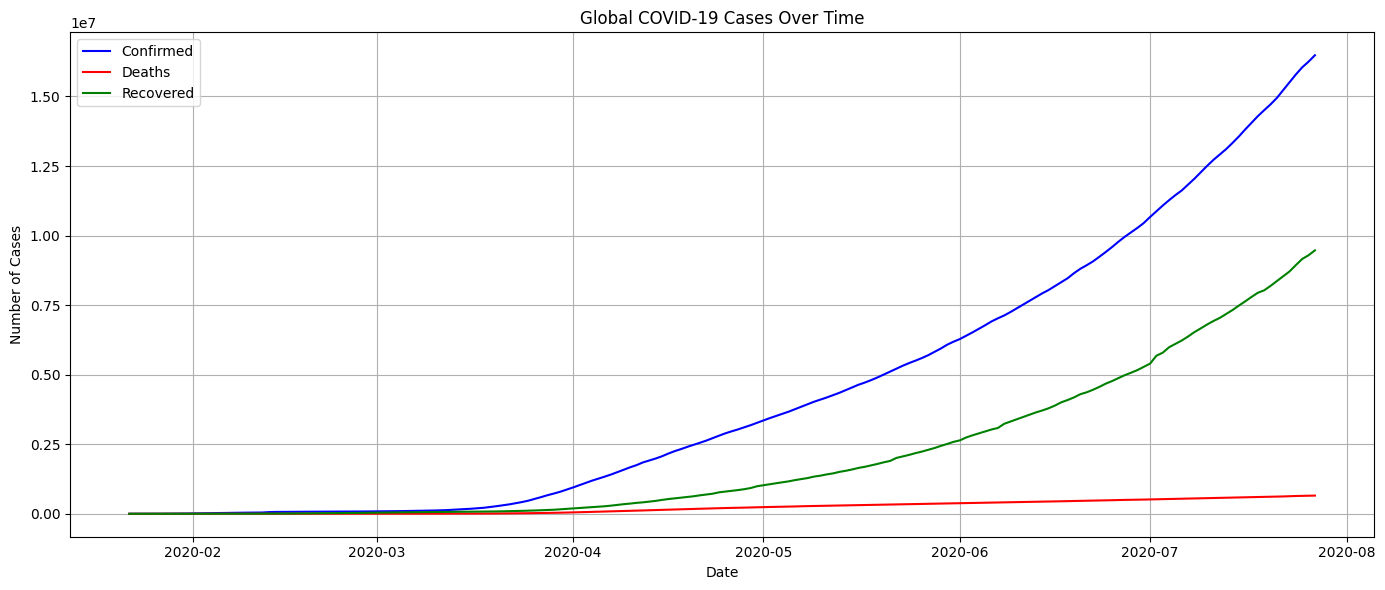

In [6]:
# Trend of Confirmed, Deaths, and Recovered Cases Over Time (Global)
global_trend=df.groupby('Date')[['Confirmed','Deaths','Recovered']].sum().reset_index()
global_trend.head()

#plotting
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,6))
plt.plot(global_trend['Date'],global_trend['Confirmed'],label='Confirmed',color='blue')
plt.plot(global_trend['Date'],global_trend['Deaths'],label='Deaths',color='red')
plt.plot(global_trend['Date'],global_trend['Recovered'],label='Recovered',color='green')
plt.title('Global COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
global_trend.head()

,Date,Confirmed,Deaths,Recovered
0,2020-01-22,555,17,28
1,2020-01-23,654,18,30
2,2020-01-24,941,26,36
3,2020-01-25,1434,42,39
4,2020-01-26,2118,56,52


In [14]:
#To find which countries were most affected
# Get the latest date in the dataset
latest_date = df['Date'].max()

# Filter the data for the latest date
latest_data = df[df['Date'] == latest_date]

# Group by Country/Region
country_summary=latest_data.groupby('Country/Region')[['Confirmed','Deaths','Recovered']].sum().sort_values(by='Confirmed', ascending=False)
country_summary.head()

# Display top 10 affected countries
country_summary.head(10)

,Confirmed,Deaths,Recovered
Country/Region,,,
US,4290259,148011,1325804
Brazil,2442375,87618,1846641
India,1480073,33408,951166
Russia,816680,13334,602249
South Africa,452529,7067,274925
Mexico,395489,44022,303810
Peru,389717,18418,272547
Chile,347923,9187,319954
United Kingdom,301708,45844,1437


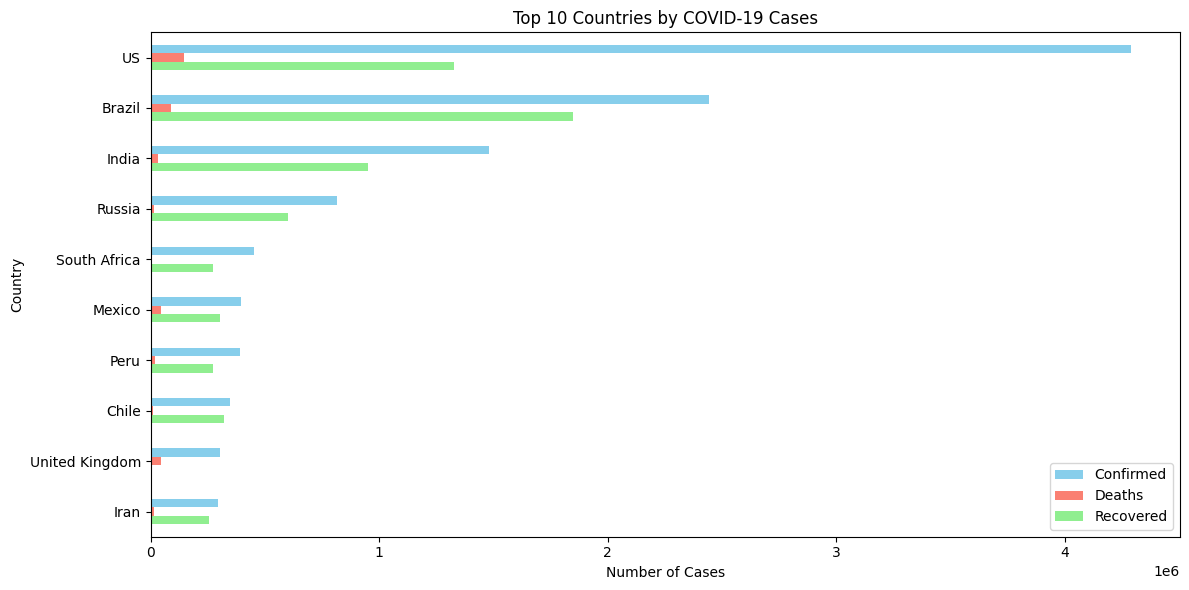

In [10]:
#
# Select top 10 countries
top_10 = country_summary.head(10)

# Plot
top_10.plot(kind='barh', figsize=(12, 6), color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Top 10 Countries by COVID-19 Cases')
plt.xlabel('Number of Cases')
plt.ylabel('Country')
plt.gca().invert_yaxis()  # Highest on top
plt.tight_layout()
plt.show()

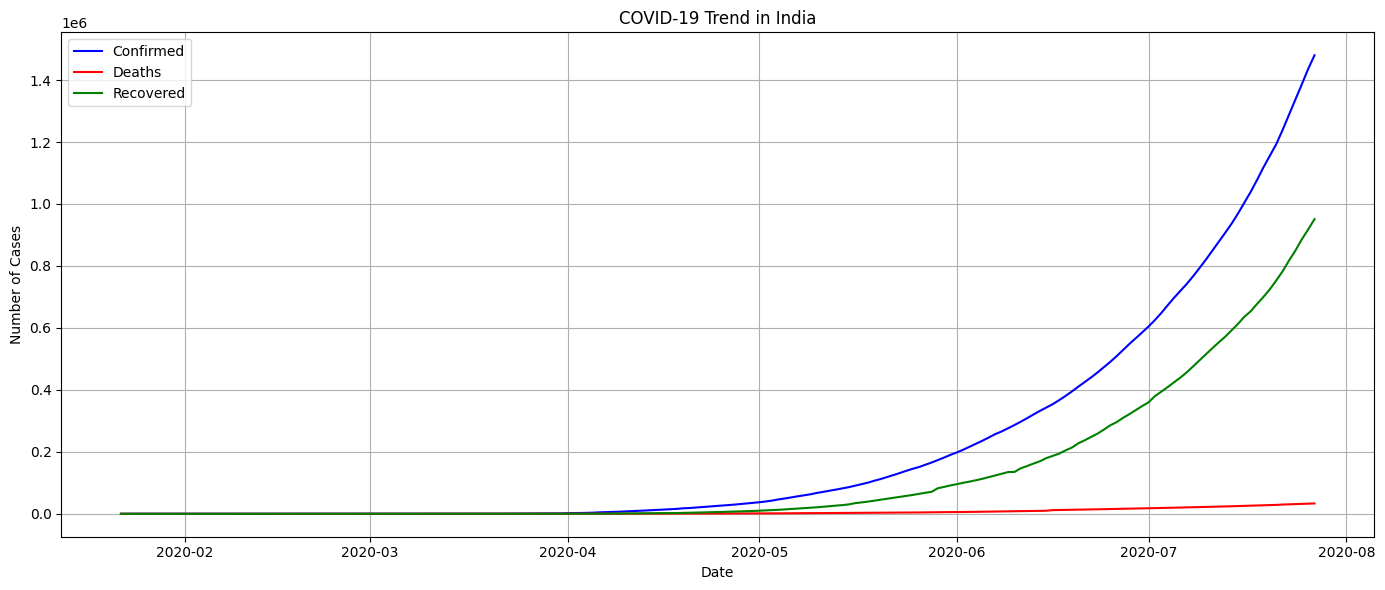

In [12]:
# Filter data for a specific country
country = 'India'  # change this to any country you want
country_data = df[df['Country/Region'] == country]

# Group by date
country_trend = country_data.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

## Plotting
plt.figure(figsize=(14,6))
plt.plot(country_trend['Date'], country_trend['Confirmed'], label='Confirmed', color='blue')
plt.plot(country_trend['Date'], country_trend['Deaths'], label='Deaths', color='red')
plt.plot(country_trend['Date'], country_trend['Recovered'], label='Recovered', color='green')
plt.title(f'COVID-19 Trend in {country}')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

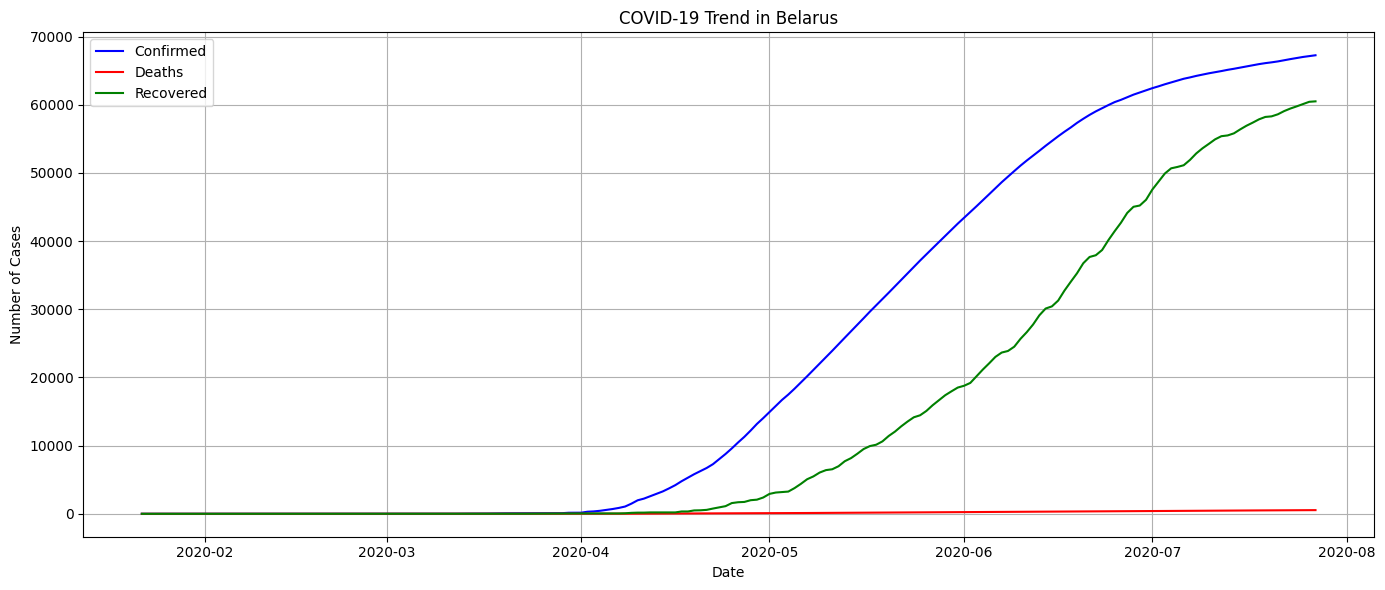

In [13]:
# Filter data for a specific country
country = 'Belarus'  # change this to any country you want
country_data = df[df['Country/Region'] == country]

# Group by date
country_trend = country_data.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

## Plotting
plt.figure(figsize=(14,6))
plt.plot(country_trend['Date'], country_trend['Confirmed'], label='Confirmed', color='blue')
plt.plot(country_trend['Date'], country_trend['Deaths'], label='Deaths', color='red')
plt.plot(country_trend['Date'], country_trend['Recovered'], label='Recovered', color='green')
plt.title(f'COVID-19 Trend in {country}')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
#Countries with Highest Death Rate
# Create a copy to avoid SettingWithCopyWarning
# Create a copy to avoid SettingWithCopyWarning
country_rate = country_summary.copy()

# Calculate Death Rate (%)
country_rate['Death Rate (%)'] = (country_rate['Deaths'] / country_rate['Confirmed']) * 100

# Drop countries with very low confirmed cases to avoid inflated % rates
country_rate = country_rate[country_rate['Confirmed'] > 1000]

# Sort and display top 10
highest_death_rates = country_rate.sort_values(by='Death Rate (%)', ascending=False).head(10)
highest_death_rates[['Deaths', 'Confirmed', 'Death Rate (%)']]



,Deaths,Confirmed,Death Rate (%)
Country/Region,,,
Yemen,483,1691,28.562980
United Kingdom,45844,301708,15.194824
Belgium,9822,66428,14.785934
Italy,35112,246286,14.256596
France,30212,220352,13.710790
Hungary,596,4448,13.399281
Netherlands,6160,53413,11.532773
Mexico,44022,395489,11.131030
Spain,28432,272421,10.436787


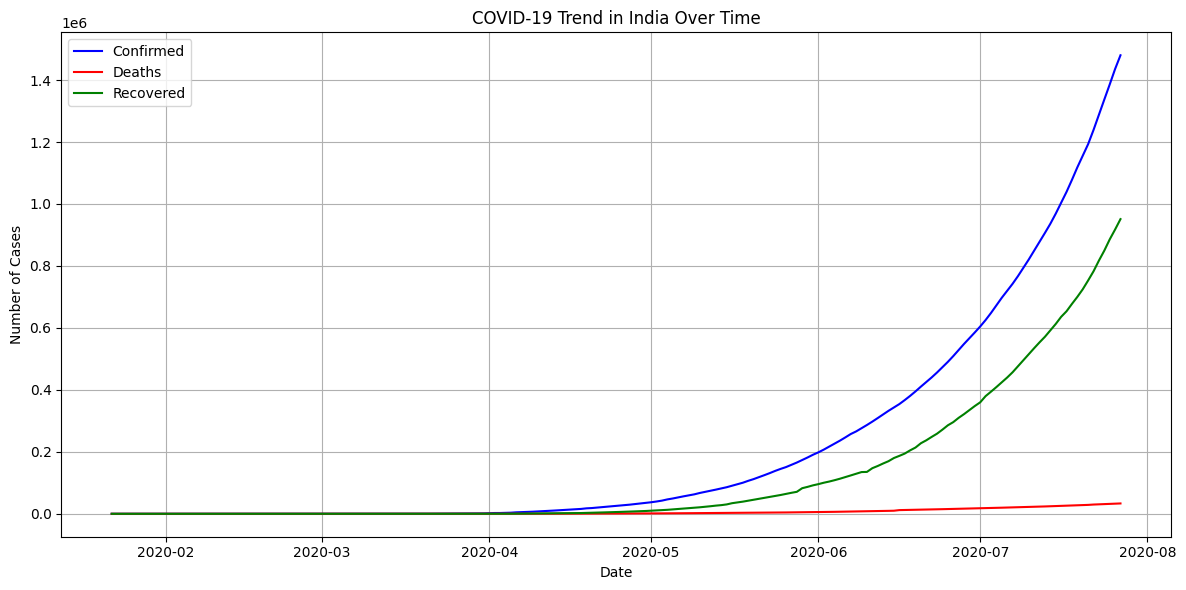

In [16]:
#Plot Confirmed, Deaths, and Recovered over time for India.
# Filter data for India
india_data = df[df['Country/Region'] == 'India']

# Group by date and sum values (in case of multiple provinces/states)
india_daily = india_data.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum()

# Plot the trend
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(india_daily.index, india_daily['Confirmed'], label='Confirmed', color='blue')
plt.plot(india_daily.index, india_daily['Deaths'], label='Deaths', color='red')
plt.plot(india_daily.index, india_daily['Recovered'], label='Recovered', color='green')
plt.title('COVID-19 Trend in India Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


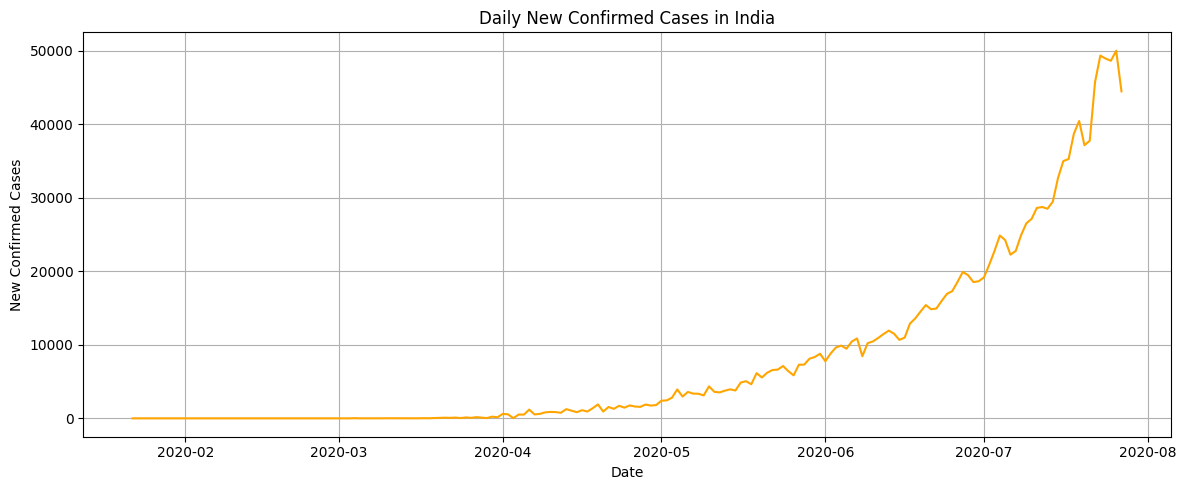

In [17]:
#Calculate Daily New Cases (Confirmed, Deaths, Recovered)
# Calculate daily new cases in India
india_daily['New_Confirmed'] = india_daily['Confirmed'].diff().fillna(0)
india_daily['New_Deaths'] = india_daily['Deaths'].diff().fillna(0)
india_daily['New_Recovered'] = india_daily['Recovered'].diff().fillna(0)

# Plot daily new confirmed cases
plt.figure(figsize=(12,5))
plt.plot(india_daily.index, india_daily['New_Confirmed'], label='New Confirmed', color='orange')
plt.title('Daily New Confirmed Cases in India')
plt.xlabel('Date')
plt.ylabel('New Confirmed Cases')
plt.grid(True)
plt.tight_layout()
plt.show()


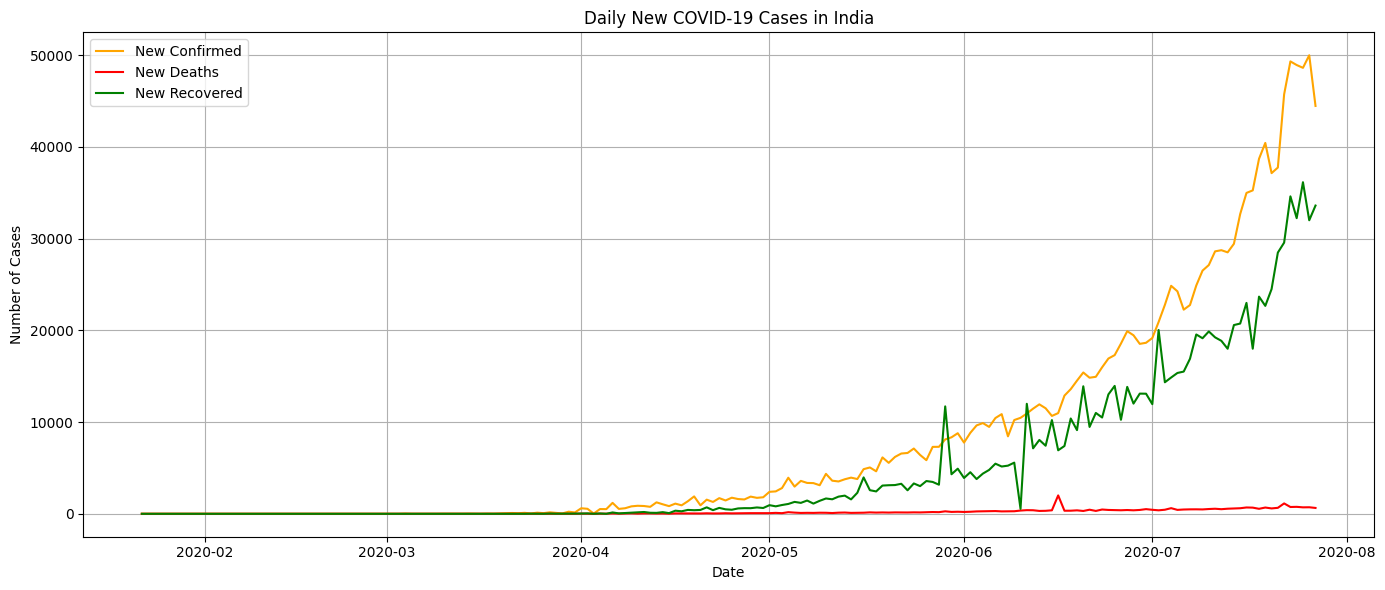

In [18]:
#📊 Visualize All Daily Trends Together
plt.figure(figsize=(14,6))

plt.plot(india_daily.index, india_daily['New_Confirmed'], label='New Confirmed', color='orange')
plt.plot(india_daily.index, india_daily['New_Deaths'], label='New Deaths', color='red')
plt.plot(india_daily.index, india_daily['New_Recovered'], label='New Recovered', color='green')

plt.title('Daily New COVID-19 Cases in India')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Text(107.09722222222221, 0.5, 'Number of Cases')

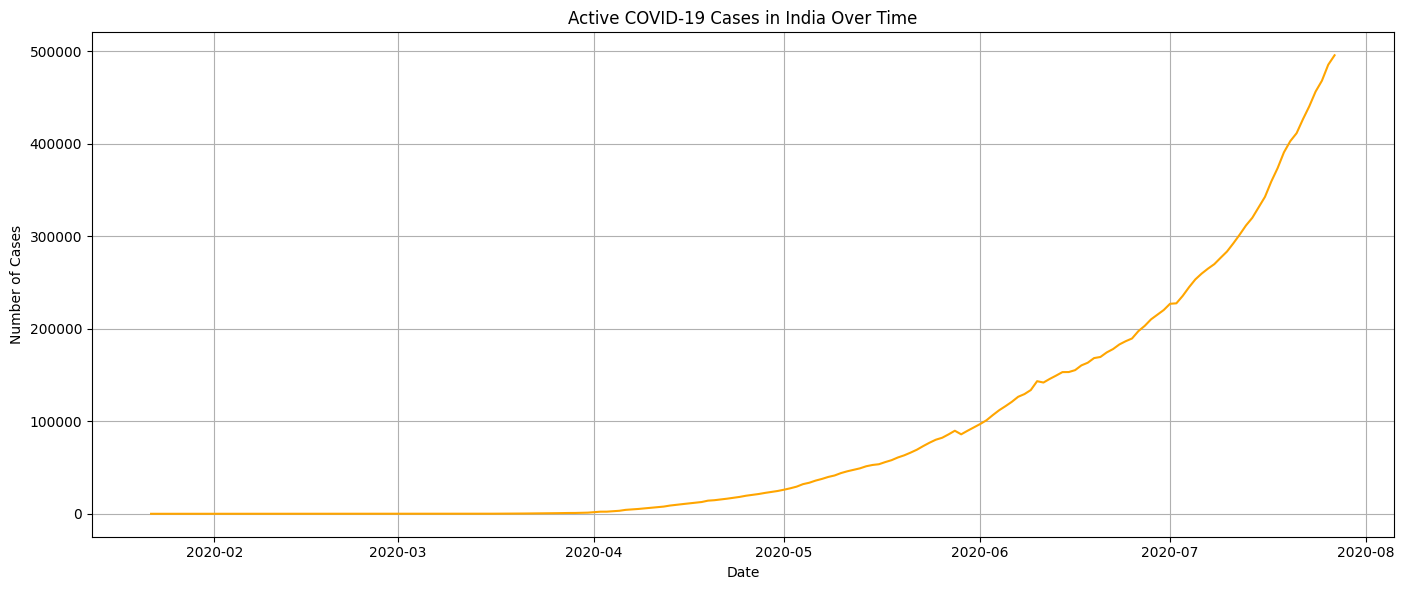

In [20]:
#Trend of Active Cases in India
#Active Cases = Confirmed - Deaths - Recovered
india_daily['Active_cases']=india_daily['Confirmed']-india_daily['Deaths']-india_daily['Recovered']
plt.figure(figsize=(14,6))
plt.plot(india_daily.index, india_daily['Active_cases'], label='Active Cases', color='orange')
plt.title('Active COVID-19 Cases in India Over Time')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.ylabel('Number of Cases')

In [24]:
# Identify Peak Active Cases in India
# Find the date with the highest active cases
peak_active = india_daily['Active_cases'].idxmax()
peak_value = india_daily['Active_cases'].max()

print(f"📅 Peak active cases were on: {peak_active.date()} with {peak_value:,} active cases.")


📅 Peak active cases were on: 2020-07-27 with 495,499 active cases.


            Pct_Active  Pct_Deaths  Pct_Recovered
Date                                             
2020-01-22         NaN         NaN            NaN
2020-01-23         NaN         NaN            NaN
2020-01-24         NaN         NaN            NaN
2020-01-25         NaN         NaN            NaN
2020-01-26         NaN         NaN            NaN
...                ...         ...            ...
2020-07-23   34.181761    2.375655      63.442584
2020-07-24   34.123097    2.345358      63.531545
2020-07-25   33.775273    2.313741      63.910987
2020-07-26   33.802702    2.282713      63.914584
2020-07-27   33.478011    2.257186      64.264803

[188 rows x 3 columns]


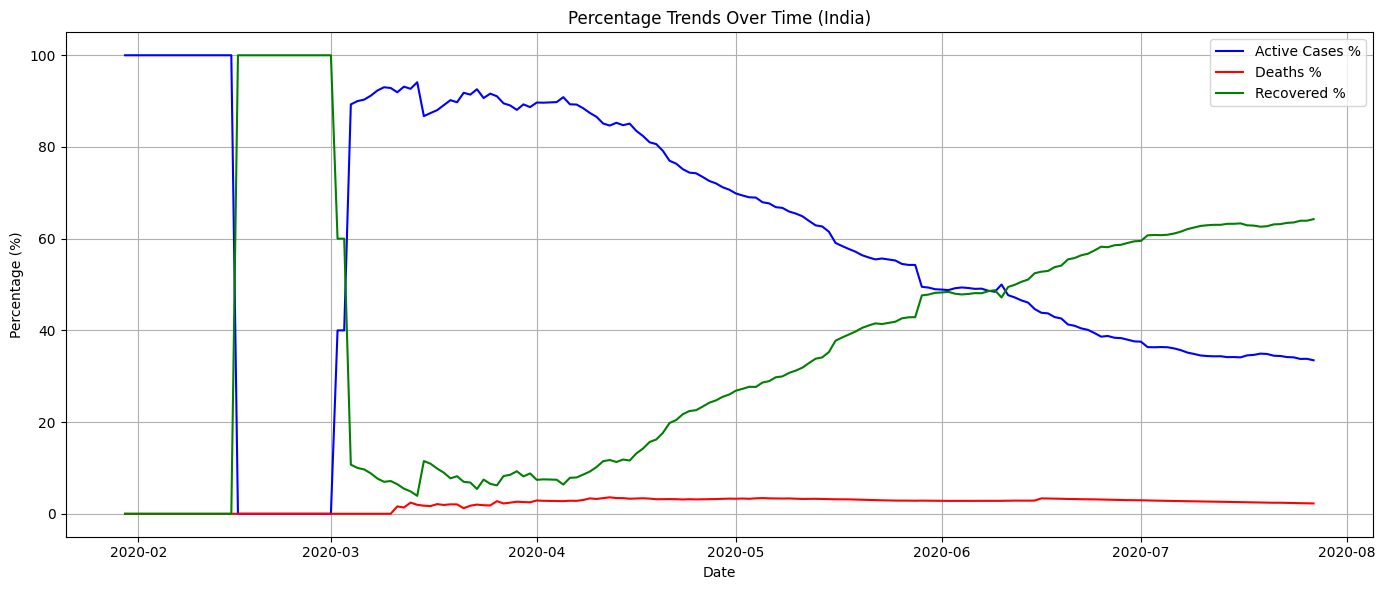

In [25]:
#Daily Trends as Percentage of Total Cases
india_daily['Pct_Active'] = (india_daily['Active_cases'] / india_daily['Confirmed']) * 100
india_daily['Pct_Deaths'] = (india_daily['Deaths'] / india_daily['Confirmed']) * 100
india_daily['Pct_Recovered'] = (india_daily['Recovered'] / india_daily['Confirmed']) * 100

print(india_daily[['Pct_Active', 'Pct_Deaths', 'Pct_Recovered']])

plt.figure(figsize=(14,6))
plt.plot(india_daily.index, india_daily['Pct_Active'], label='Active Cases %', color='blue')
plt.plot(india_daily.index, india_daily['Pct_Deaths'], label='Deaths %', color='red')
plt.plot(india_daily.index, india_daily['Pct_Recovered'], label='Recovered %', color='green')

plt.title('Percentage Trends Over Time (India)')
plt.xlabel('Date')
plt.ylabel('Percentage (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
